<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data(y_hat)_add_delta_(3_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_3.2_n250.csv',
 'data_add_delta_3.2_n120.csv',
 'data_add_delta_3.2_n60.csv',
 'data_add_delta_3.2_n30.csv',
 'data_add_delta_3.2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.771760,61.382382,80.037372,72.629383,-528.844841,-211.023944,154.450234,-365.474178
1,0.0,1.0,97.273250,95.389927,46.337033,91.496976,186.994819,527.492006,474.540261,52.951744
2,0.0,2.0,85.436109,72.064254,77.839962,69.602865,684.316716,999.259906,410.138590,589.121315
3,0.0,3.0,49.962735,26.466925,91.858432,38.800166,-365.923460,-148.835202,-3.218016,-145.617186
4,0.0,4.0,58.321320,57.901760,26.123967,34.411950,-1494.401064,-1307.642068,-85.200576,-1222.441492
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.007403,92.094413,60.466503,52.378848,-845.417829,-596.470662,3.779810,-600.250472
19996,999.0,16.0,40.581001,46.106797,22.550997,31.646294,412.819907,563.704995,488.527549,75.177447
19997,999.0,17.0,94.196937,83.138007,89.073822,50.890757,-945.367998,-618.068475,59.339927,-677.408401
19998,999.0,18.0,47.445867,65.529732,60.451290,92.082617,-777.250015,-501.740508,646.969855,-1148.710363


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.771760,61.382382,80.037372,72.629383,-528.844841,-211.023944,154.450234,-365.474178
1,0.0,1.0,97.273250,95.389927,46.337033,91.496976,186.994819,527.492006,474.540261,52.951744
2,0.0,2.0,85.436109,72.064254,77.839962,69.602865,684.316716,999.259906,410.138590,589.121315
3,0.0,3.0,49.962735,26.466925,91.858432,38.800166,-365.923460,-148.835202,-3.218016,-145.617186
4,0.0,4.0,58.321320,57.901760,26.123967,34.411950,-1494.401064,-1307.642068,-85.200576,-1222.441492
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.007403,92.094413,60.466503,52.378848,-845.417829,-596.470662,3.779810,-600.250472
19996,999.0,16.0,40.581001,46.106797,22.550997,31.646294,412.819907,563.704995,488.527549,75.177447
19997,999.0,17.0,94.196937,83.138007,89.073822,50.890757,-945.367998,-618.068475,59.339927,-677.408401
19998,999.0,18.0,47.445867,65.529732,60.451290,92.082617,-777.250015,-501.740508,646.969855,-1148.710363


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    93.771760  61.382382  80.037372  72.629383  -528.844841   
      1.0    97.273250  95.389927  46.337033  91.496976   186.994819   
      2.0    85.436109  72.064254  77.839962  69.602865   684.316716   
      3.0    49.962735  26.466925  91.858432  38.800166  -365.923460   
      4.0    58.321320  57.901760  26.123967  34.411950 -1494.401064   
...                ...        ...        ...        ...          ...   
999.0 15.0   34.007403  92.094413  60.466503  52.378848  -845.417829   
      16.0   40.581001  46.106797  22.550997  31.646294   412.819907   
      17.0   94.196937  83.138007  89.073822  50.890757  -945.367998   
      18.0   47.445867  65.529732  60.451290  92.082617  -777.250015   
      19.0   23.468051  63.331305  54.097369  23.992728   304.548030   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -211.023944  154.450234  -365.474178  
      1.0     527.492006  474.540261    52.951744  
      2.0     999.259906  410.138590   589.121315  
      3.0    -148.835202   -3.218016  -145.617186  
      4.0   -1307.642068  -85.200576 -1222.441492  
...                  ...         ...          ...  
999.0 15.0   -596.470662    3.779810  -600.250472  
      16.0    563.704995  488.527549    75.177447  
      17.0   -618.068475   59.339927  -677.408401  
      18.0   -501.740508  646.969855 -1148.710363  
      19.0    479.437483 -241.991855   721.429338  

[20000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    93.771760  61.382382  80.037372  72.629383  -528.844841   
      1.0    97.273250  95.389927  46.337033  91.496976   186.994819   
      2.0    85.436109  72.064254  77.839962  69.602865   684.316716   
      3.0    49.962735  26.466925  91.858432  38.800166  -365.923460   
      4.0    58.321320  57.901760  26.123967  34.411950 -1494.401064   
...                ...        ...        ...        ...          ...   
999.0 15.0   34.007403  92.094413  60.466503  52.378848  -845.417829   
      16.0   40.581001  46.106797  22.550997  31.646294   412.819907   
      17.0   94.196937  83.138007  89.073822  50.890757  -945.367998   
      18.0   47.445867  65.529732  60.451290  92.082617  -777.250015   
      19.0   23.468051  63.331305  54.097369  23.992728   304.548030   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -211.023944  154.450234  -365.474178  
      1.0     527.492006  474.540261    52.951744  
      2.0     999.259906  410.138590   589.121315  
      3.0    -148.835202   -3.218016  -145.617186  
      4.0   -1307.642068  -85.200576 -1222.441492  
...                  ...         ...          ...  
999.0 15.0   -596.470662    3.779810  -600.250472  
      16.0    563.704995  488.527549    75.177447  
      17.0   -618.068475   59.339927  -677.408401  
      18.0   -501.740508  646.969855 -1148.710363  
      19.0    479.437483 -241.991855   721.429338  

[20000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,93.771760,61.382382,80.037372,72.629383,-528.844841,-211.023944,154.450234,-365.474178
1,0.0,1.0,97.273250,95.389927,46.337033,91.496976,186.994819,527.492006,474.540261,52.951744
2,0.0,2.0,85.436109,72.064254,77.839962,69.602865,684.316716,999.259906,410.138590,589.121315
3,0.0,3.0,49.962735,26.466925,91.858432,38.800166,-365.923460,-148.835202,-3.218016,-145.617186
4,0.0,4.0,58.321320,57.901760,26.123967,34.411950,-1494.401064,-1307.642068,-85.200576,-1222.441492
...,...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,34.007403,92.094413,60.466503,52.378848,-845.417829,-596.470662,3.779810,-600.250472
19996,999.0,16.0,40.581001,46.106797,22.550997,31.646294,412.819907,563.704995,488.527549,75.177447
19997,999.0,17.0,94.196937,83.138007,89.073822,50.890757,-945.367998,-618.068475,59.339927,-677.408401
19998,999.0,18.0,47.445867,65.529732,60.451290,92.082617,-777.250015,-501.740508,646.969855,-1148.710363


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    93.771760  61.382382  80.037372  72.629383  -528.844841   
      1.0    97.273250  95.389927  46.337033  91.496976   186.994819   
      2.0    85.436109  72.064254  77.839962  69.602865   684.316716   
      3.0    49.962735  26.466925  91.858432  38.800166  -365.923460   
      4.0    58.321320  57.901760  26.123967  34.411950 -1494.401064   
...                ...        ...        ...        ...          ...   
999.0 15.0   34.007403  92.094413  60.466503  52.378848  -845.417829   
      16.0   40.581001  46.106797  22.550997  31.646294   412.819907   
      17.0   94.196937  83.138007  89.073822  50.890757  -945.367998   
      18.0   47.445867  65.529732  60.451290  92.082617  -777.250015   
      19.0   23.468051  63.331305  54.097369  23.992728   304.548030   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    -211.023944  154.450234  -365.474178  
      1.0     527.492006  474.540261    52.951744  
      2.0     999.259906  410.138590   589.121315  
      3.0    -148.835202   -3.218016  -145.617186  
      4.0   -1307.642068  -85.200576 -1222.441492  
...                  ...         ...          ...  
999.0 15.0   -596.470662    3.779810  -600.250472  
      16.0    563.704995  488.527549    75.177447  
      17.0   -618.068475   59.339927  -677.408401  
      18.0   -501.740508  646.969855 -1148.710363  
      19.0    479.437483 -241.991855   721.429338  

[20000 rows x 8 columns]

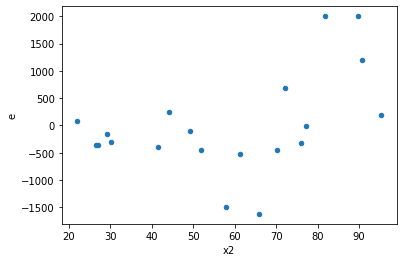

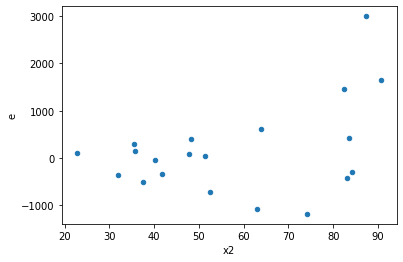

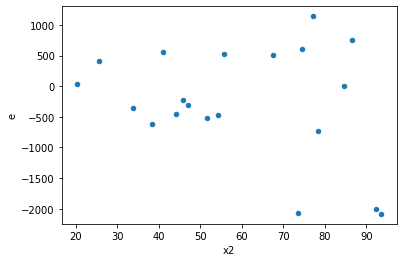

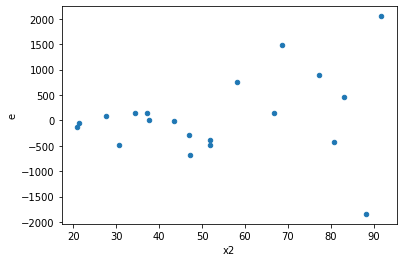

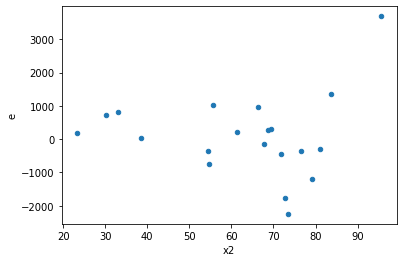

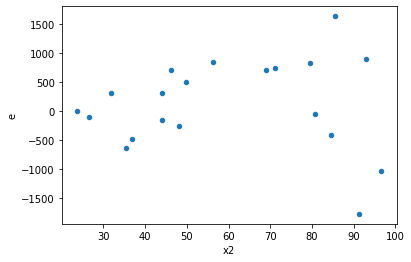

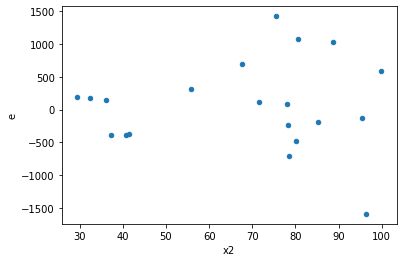

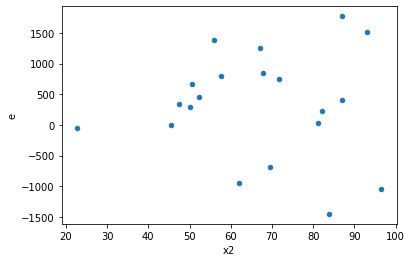

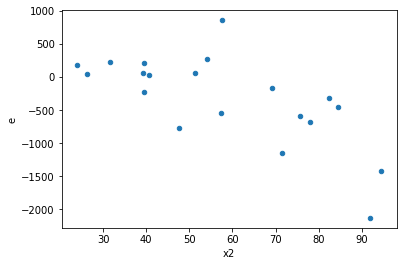

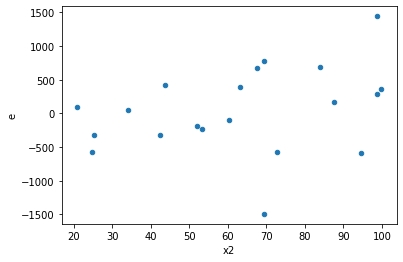

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,4.0,4.0,510401.49719063984,3764199.55078043,127600.37429765996,941049.8876951075,7.374977486350251,0.07873349384083395,0.960633253079583,0.03936674692041697,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,539001.4643397306,1170720.2309139997,134750.36608493264,292680.05772849993,2.172016790989828,0.470991690394275,0.7645041548028625,0.2354958451971375,Reject001=1 : Homoscedasticity
3.0,4.0,4.0,159779.44434691675,6221641.962713094,39944.861086729186,1555410.4906782736,38.93893853582645,0.0036986881923173343,0.9981506559038413,0.0018493440961586671,Reject001=0 : Heteroscedasticity
4.0,4.0,4.0,6159445.900299073,10309170.87820051,1539861.4750747683,2577292.7195501276,1.673717253965969,0.6300327617505346,0.6849836191247327,0.3150163808752673,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,1698989.4951208166,2530072.937239424,424747.37378020416,632518.234309856,1.4891633788821679,0.7090188722536281,0.6454905638731859,0.35450943612681407,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,662608.7045245006,1861026.9557779934,165652.17613112516,465256.73894449836,2.8086364442095553,0.34122802877042724,0.8293859856147864,0.17061401438521362,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,3315306.1684393547,4265769.553076418,828826.5421098387,1066442.3882691045,1.2866894749224576,0.812925601343784,0.593537199328108,0.406462800671892,Reject001=1 : Homoscedasticity
9.0,4.0,4.0,377302.45859894925,789439.2124644424,94325.61464973731,197359.8031161106,2.0923245912467556,0.49218183717642106,0.7539090814117895,0.24609091858821053,Reject001=1 : Homoscedasticity
12.0,4.0,4.0,1451743.9596564432,4770303.658509063,362935.9899141108,1192575.9146272657,3.285912523884694,0.27582868439361286,0.8620856578031936,0.13791434219680643,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,4.0,4.0,510401.49719063984,3764199.55078043,127600.37429765996,941049.8876951075,7.374977486350251,0.07873349384083395,Reject001=1 : Homoscedasticity
1.0,4.0,4.0,539001.4643397306,1170720.2309139997,134750.36608493264,292680.05772849993,2.172016790989828,0.470991690394275,Reject001=1 : Homoscedasticity
2.0,4.0,4.0,10444333.55578299,294424.5528744701,2611083.3889457476,73606.13821861752,0.028189884141669168,0.004427715437773988,Reject001=0 : Heteroscedasticity
3.0,4.0,4.0,159779.44434691675,6221641.962713094,39944.861086729186,1555410.4906782736,38.93893853582645,0.0036986881923173343,Reject001=0 : Heteroscedasticity
4.0,4.0,4.0,6159445.900299073,10309170.87820051,1539861.4750747683,2577292.7195501276,1.673717253965969,0.6300327617505346,Reject001=1 : Homoscedasticity
5.0,4.0,4.0,1698989.4951208166,2530072.937239424,424747.37378020416,632518.234309856,1.4891633788821679,0.7090188722536281,Reject001=1 : Homoscedasticity
6.0,4.0,4.0,662608.7045245006,1861026.9557779934,165652.17613112516,465256.73894449836,2.8086364442095553,0.34122802877042724,Reject001=1 : Homoscedasticity
7.0,4.0,4.0,3315306.1684393547,4265769.553076418,828826.5421098387,1066442.3882691045,1.2866894749224576,0.812925601343784,Reject001=1 : Homoscedasticity
8.0,4.0,4.0,1027354.4866940319,136068.06936012476,256838.62167350797,34017.01734003119,0.132445101590965,0.07567175266098457,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      894
Reject001=0 : Heteroscedasticity    106
Name: Result_test, dtype: int64